In [545]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [595]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    
import xlrd
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import PIL

In [596]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [597]:
#!pip install xlrd==1.2.0

In [598]:
book = xlrd.open_workbook(filename='/content/drive/MyDrive/BTP/Result- Part-2/Statistics with feature_eng/image20.xls')

dataset = pd.read_excel(book)

print(dataset) 

     area  equivalent_diameter  mean_intensity-0  orientation   perimeter  \
0    1277            40.322784         63.819890     0.040074  150.083261   
1    8920           106.570619         59.564686    -1.201894  540.972655   
2    6870            93.526230         66.446579    -1.501043  606.440692   
3    4637            76.837567         60.259219    -1.178088  316.013239   
4    4426            75.069023         65.765703    -1.189741  345.818326   
..    ...                  ...               ...          ...         ...   
100  8675           105.096875         66.951700     1.457755  773.126984   
101  5915            86.782555         46.614708     1.561510  458.356385   
102  1888            49.029341         57.487288     0.210767  206.231493   
103  2786            59.558756         61.623833     1.404105  361.521861   
104   663            29.054394         71.690799    -1.461895  140.390873   

     max_intensity-0  min_intensity-0  major_axis_length  minor_axis_length

In [599]:
y = dataset.iloc[:, 10]
y = nm.asarray(y)

In [600]:
dataset.drop('marker num', axis=1, inplace=True)
print(dataset.shape)

(105, 43)


In [601]:
#list(nm.arange(0, 10, 1))+list(nm.arange(23, 43, 1))
x = dataset.iloc[:, list(nm.arange(10, 23, 1))].values

In [602]:
x.shape

(105, 13)

In [603]:
# #Standard Scaler
scaler = StandardScaler()
# # transform data
scaled = scaler.fit_transform(x)
x = scaled

In [604]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict_km= kmeans.fit_predict(x)  

In [605]:
gm = GaussianMixture(n_components=2, max_iter=1000, tol=1e-4, init_params='kmeans')
y_predict_gm= gm.fit_predict(x)

In [606]:
y_predict_km

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [607]:
y_predict_gm

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [608]:
nm.sum(y_predict_gm == 1)

23

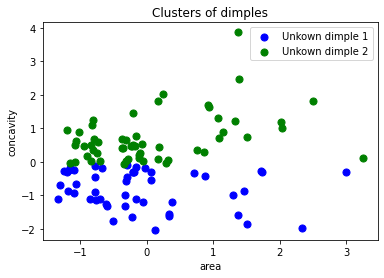

In [609]:
#visulaizing the clusters  
mtp.scatter(x[y_predict_km == 0, 0], x[y_predict_km == 0, 9], s = 50, c = 'blue', label = 'Unkown dimple 1') #for first cluster  
mtp.scatter(x[y_predict_km == 1, 0], x[y_predict_km == 1, 9], s = 50, c = 'green', label = 'Unkown dimple 2') #for second cluster    
mtp.title('Clusters of dimples')  
mtp.xlabel(dataset.columns[0])
mtp.ylabel(dataset.columns[9])
mtp.legend()  
mtp.show() 

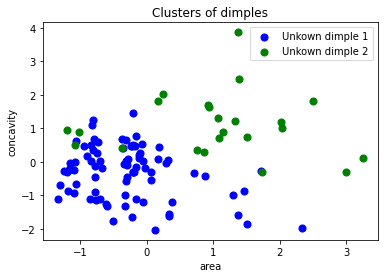

In [610]:
#visulaizing the clusters  
mtp.scatter(x[y_predict_gm == 0, 0], x[y_predict_gm == 0, 9], s = 50, c = 'blue', label = 'Unkown dimple 1') #for first cluster  
mtp.scatter(x[y_predict_gm == 1, 0], x[y_predict_gm == 1, 9], s = 50, c = 'green', label = 'Unkown dimple 2') #for second cluster    
mtp.title('Clusters of dimples')  
mtp.xlabel(dataset.columns[0])
mtp.ylabel(dataset.columns[9])
mtp.legend()  
mtp.show() 

In [611]:
silhouette_scr = silhouette_score(x, y_predict_km)
print(silhouette_scr)

0.365868409327826


In [612]:
calinski_harabasz_scr = calinski_harabasz_score(x, y_predict_km)
print(calinski_harabasz_scr)

77.26402006028911


In [613]:
davies_bouldin_scr = davies_bouldin_score(x, y_predict_km)
print(davies_bouldin_scr)

1.0153387809324292


In [614]:
silhouette_scr = silhouette_score(x, y_predict_gm)
print(silhouette_scr)

0.3376798020572384


In [615]:
calinski_harabasz_scr = calinski_harabasz_score(x, y_predict_gm)
print(calinski_harabasz_scr)

41.694338447024265


In [616]:
davies_bouldin_scr = davies_bouldin_score(x, y_predict_gm)
print(davies_bouldin_scr)

1.1826089347395143


In [617]:
df1 = pd.DataFrame(x)
#x_t = df
df1['Cluster'] = y_predict_km
# print(df['Cluster'].value_counts())
# df['Binary Cluster 0'] = df['Cluster'].map({0:1, 1:0, 9:0})
#print(df['Binary Cluster 0'])
print(df1)

            0         1         2         3         4         5         6  \
0   -0.801509  1.967289  0.878126  1.578014  1.681748  1.670174  1.748965   
1   -0.158166 -0.129467 -0.059333 -0.144507 -0.140676 -0.140843 -0.137646   
2    0.248220  2.072342 -0.122021  2.177062  2.166652  2.060123  2.072650   
3   -0.272945  0.151144  0.208262  0.115663  0.126348  0.120807  0.129757   
4   -0.054110 -1.280545  0.109498 -1.275888 -1.284971 -1.257241 -1.267267   
..        ...       ...       ...       ...       ...       ...       ...   
100  1.379516 -1.307514 -0.474765 -1.603233 -1.532181 -1.370831 -1.359428   
101  2.022310  0.585925 -1.634610  0.939677  0.846138  0.820401  0.760102   
102 -1.144602 -0.076453  1.219342 -0.136944 -0.122886 -0.121186 -0.110110   
103  2.988606 -0.290547 -2.380457 -0.299856 -0.298546 -0.300310 -0.298177   
104  0.332746 -1.523083 -0.575219 -1.613365 -1.600459 -1.617922 -1.599352   

            7         8         9        10        11        12  Cluster  


In [618]:
df2 = pd.DataFrame(x)
#x_t = df
df2['Mixture'] = y_predict_gm

In [619]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(

         random_state = 42)
rf.fit(x, df1['Cluster'])
print(rf.feature_importances_)

[0.         0.06711694 0.00185133 0.1        0.09925532 0.1407531
 0.15775504 0.00037393 0.00037716 0.13037433 0.13139447 0.1007484
 0.07      ]


In [620]:
rf2 = RandomForestClassifier(

         random_state = 42)
rf2.fit(x, df2['Mixture'])
print(rf2.feature_importances_)

[0.12634849 0.02791695 0.14891658 0.0694835  0.04312083 0.05611331
 0.0297502  0.11613266 0.06851414 0.12112028 0.05007057 0.075613
 0.0668995 ]


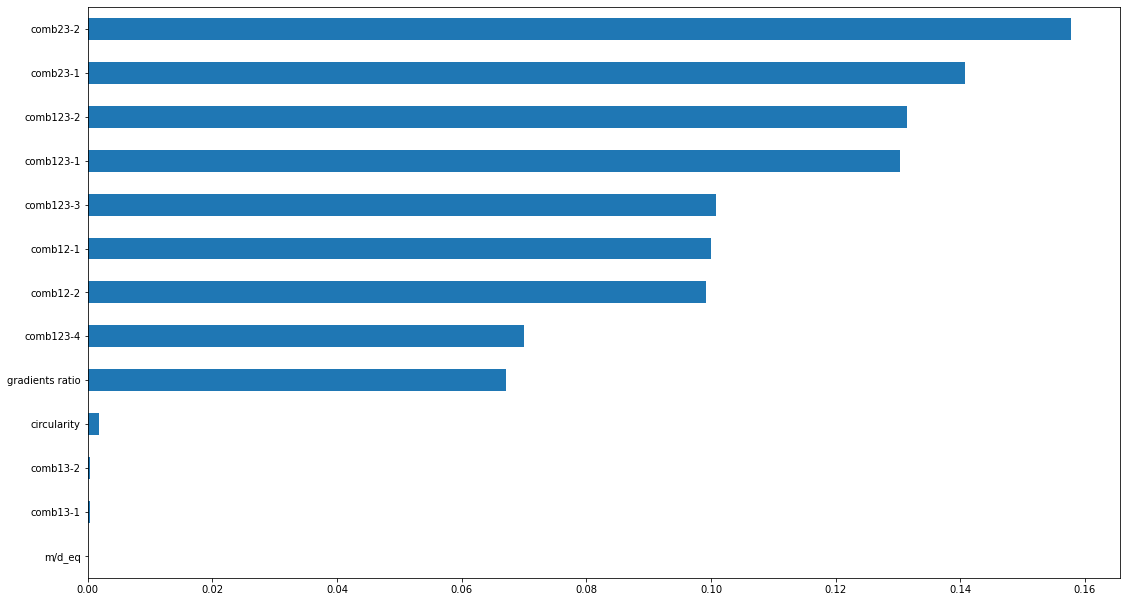

In [621]:
#from matplotlib.pyplot import figure
# list(nm.arange(0, 10, 1)) + list(nm.arange(23, 43, 1))
import matplotlib
feat_importances = pd.Series(rf.feature_importances_, index = dataset.columns[list(nm.arange(10, 23, 1))]).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
#dataset.columns


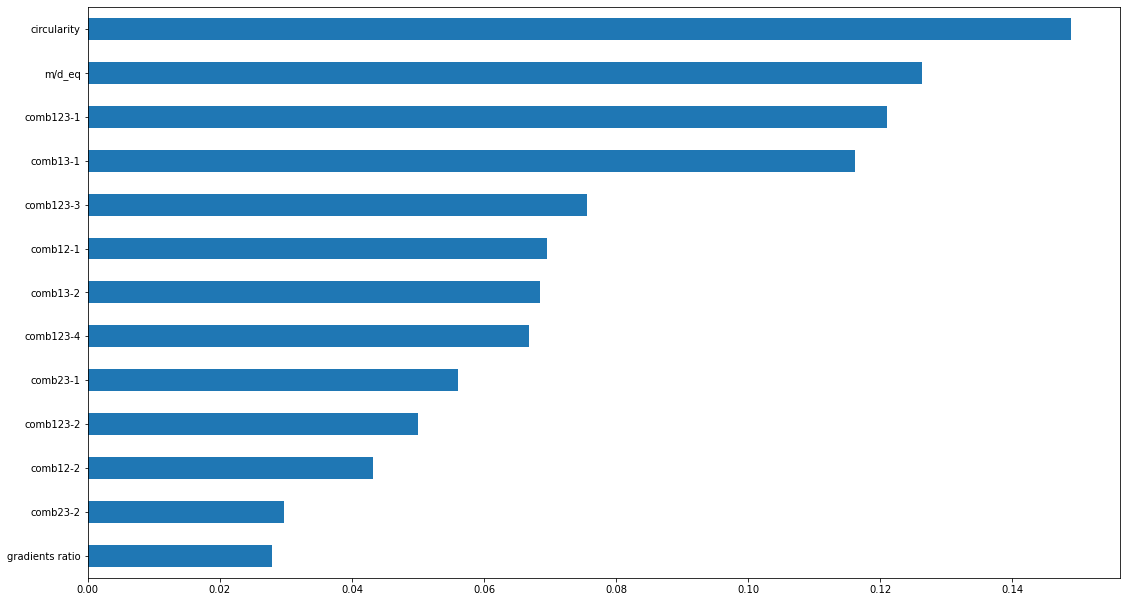

In [622]:
import matplotlib
feat_importances = pd.Series(rf2.feature_importances_, index = dataset.columns[list(nm.arange(10, 23, 1))]).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [623]:
## from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=1)
# clf.fit(df[[0, 9]].values, df["Binary Cluster 0"].values)

# # Index sort the most important features
# sorted_feature_weight_idxes = nm.argsort(clf.feature_importances_)[::-1] # Reverse sort

# # Get the most important features names and weights
# most_important_features = nm.take_along_axis(
#     nm.array(df.iloc[:, 1:].columns.tolist()), 
#     sorted_feature_weight_idxes, axis=0)
# most_important_weights = nm.take_along_axis(
#     nm.array(clf.feature_importances_), 
#     sorted_feature_weight_idxes, axis=0)

# # Show
# list(zip(most_important_features, most_important_weights))

# # [('Feature1', 0.59), ('Feature2', 0.41)]

In [624]:
import cv2
import glob
from skimage import measure, color, io

In [625]:
fractographs  = glob.glob('/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/*.*')
fractographs.sort()

In [626]:
image_idx = 0
iter = 50
mul_param = 0.25
conc_thresh = 0.3
area_thresh = 10000

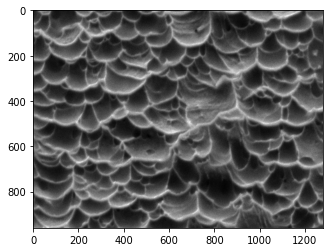

In [627]:
img = cv2.imread(fractographs[image_idx], 0)
mtp.imshow(img, cmap='gray')

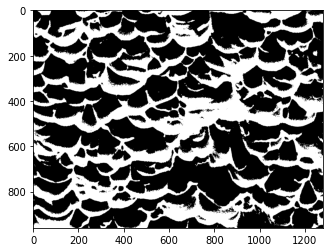

In [628]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mtp.imshow(thresh, cmap='gray')

In [629]:
kernel = nm.ones((1, 1), nm.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=iter)
opening = (nm.logical_not(opening)).astype(nm.uint8)

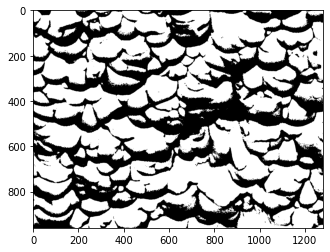

In [630]:
mtp.imshow(opening, cmap='gray')

In [631]:
sure_bg = cv2.dilate(opening, kernel, iterations=iter)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
ret2, sure_fg = cv2.threshold(dist_transform, mul_param*dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(nm.uint8)
unknown = cv2.subtract(sure_bg, sure_fg)

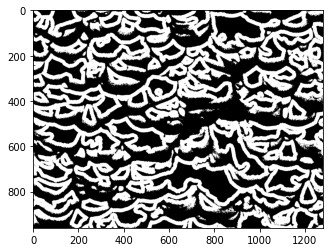

In [632]:
mtp.imshow(unknown, cmap='gray')

In [633]:
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers[unknown==1] = 0

In [634]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(img, nm.int32(markers))
img2 = color.label2rgb(markers, bg_label=10)

<Figure size 432x576 with 0 Axes>

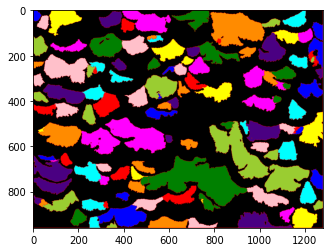

<Figure size 432x576 with 0 Axes>

In [635]:
mtp.imshow(img2, cmap='jet')
mtp.figure(figsize=(6, 8))

In [636]:
markers_dup = nm.empty((markers.shape))

In [637]:
ind = 0
for marker_num in nm.unique(markers):
    if marker_num in y:
        markers_dup[markers == marker_num] = y_predict_km[ind]
        ind += 1
    elif marker_num == -1:
        markers_dup[markers == -1] = 2
    elif marker_num == 0:
        markers_dup[markers == 0] = 3
    else:
        markers_dup[nm.where(markers == marker_num)] = 4


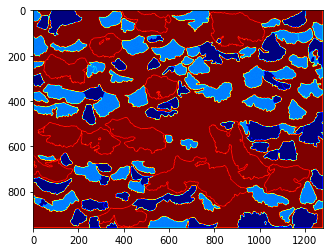

In [638]:
mtp.imshow(markers_dup, cmap='jet')
mtp.show()

In [639]:
markers_dup2 = nm.empty((markers.shape))

In [640]:
ind = 0
for marker_num in nm.unique(markers):
    if marker_num in y:
        markers_dup2[markers == marker_num] = y_predict_gm[ind]
        ind += 1
    elif marker_num == -1:
        markers_dup2[markers == -1] = 2
    elif marker_num == 0:
        markers_dup2[markers == 0] = 3
    else:
        markers_dup2[nm.where(markers == marker_num)] = 4


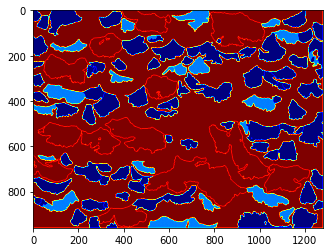

In [641]:
mtp.imshow(markers_dup2, cmap='jet')
mtp.show()

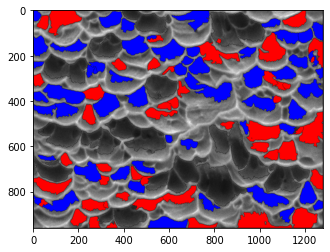

In [642]:
img[markers_dup == 0] = [255, 0, 0]
img[markers_dup == 1] = [0, 0, 255]
img[markers == -1] = [0, 0, 0]
mtp.imshow(img)
mtp.show()

In [643]:
avgM_class_0 = nm.sum(dataset.loc[list(nm.where(~y_predict_km.astype(bool))[0]), 'comb23-2'])/len(nm.where(~y_predict_km.astype(bool))[0])
avgM_class_1 = nm.sum(dataset.loc[list(nm.where(y_predict_km.astype(bool))[0]), 'comb23-2'])/len(nm.where(y_predict_km.astype(bool))[0])

if abs(avgM_class_0-1) > abs(avgM_class_1-1):
    sheared_area = nm.sum(dataset.loc[list(nm.where(~y_predict_km.astype(bool))[0]), 'area'])
    normal_area = nm.sum(dataset.loc[list(nm.where(y_predict_km.astype(bool))[0]), 'area'])
else:
    normal_area = nm.sum(dataset.loc[list(nm.where(~y_predict_km.astype(bool))[0]), 'area'])
    sheared_area = nm.sum(dataset.loc[list(nm.where(y_predict_km.astype(bool))[0]), 'area'])

print('percentage sheared dimples:', '{0:.2f}%'.format((sheared_area/(sheared_area + normal_area))*100))
print('percentage normal dimples:', '{0:.2f}%'.format((normal_area/(sheared_area + normal_area))*100))


percentage sheared dimples: 44.15%
percentage normal dimples: 55.85%
